# Import Lib

In [4]:
#import library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [5]:
#import Dataset.
data = pd.read_csv('election_results_2024.csv')

In [6]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


# Party with highest and lowest margin of victory

In [6]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

# Plot number of seats won by each party

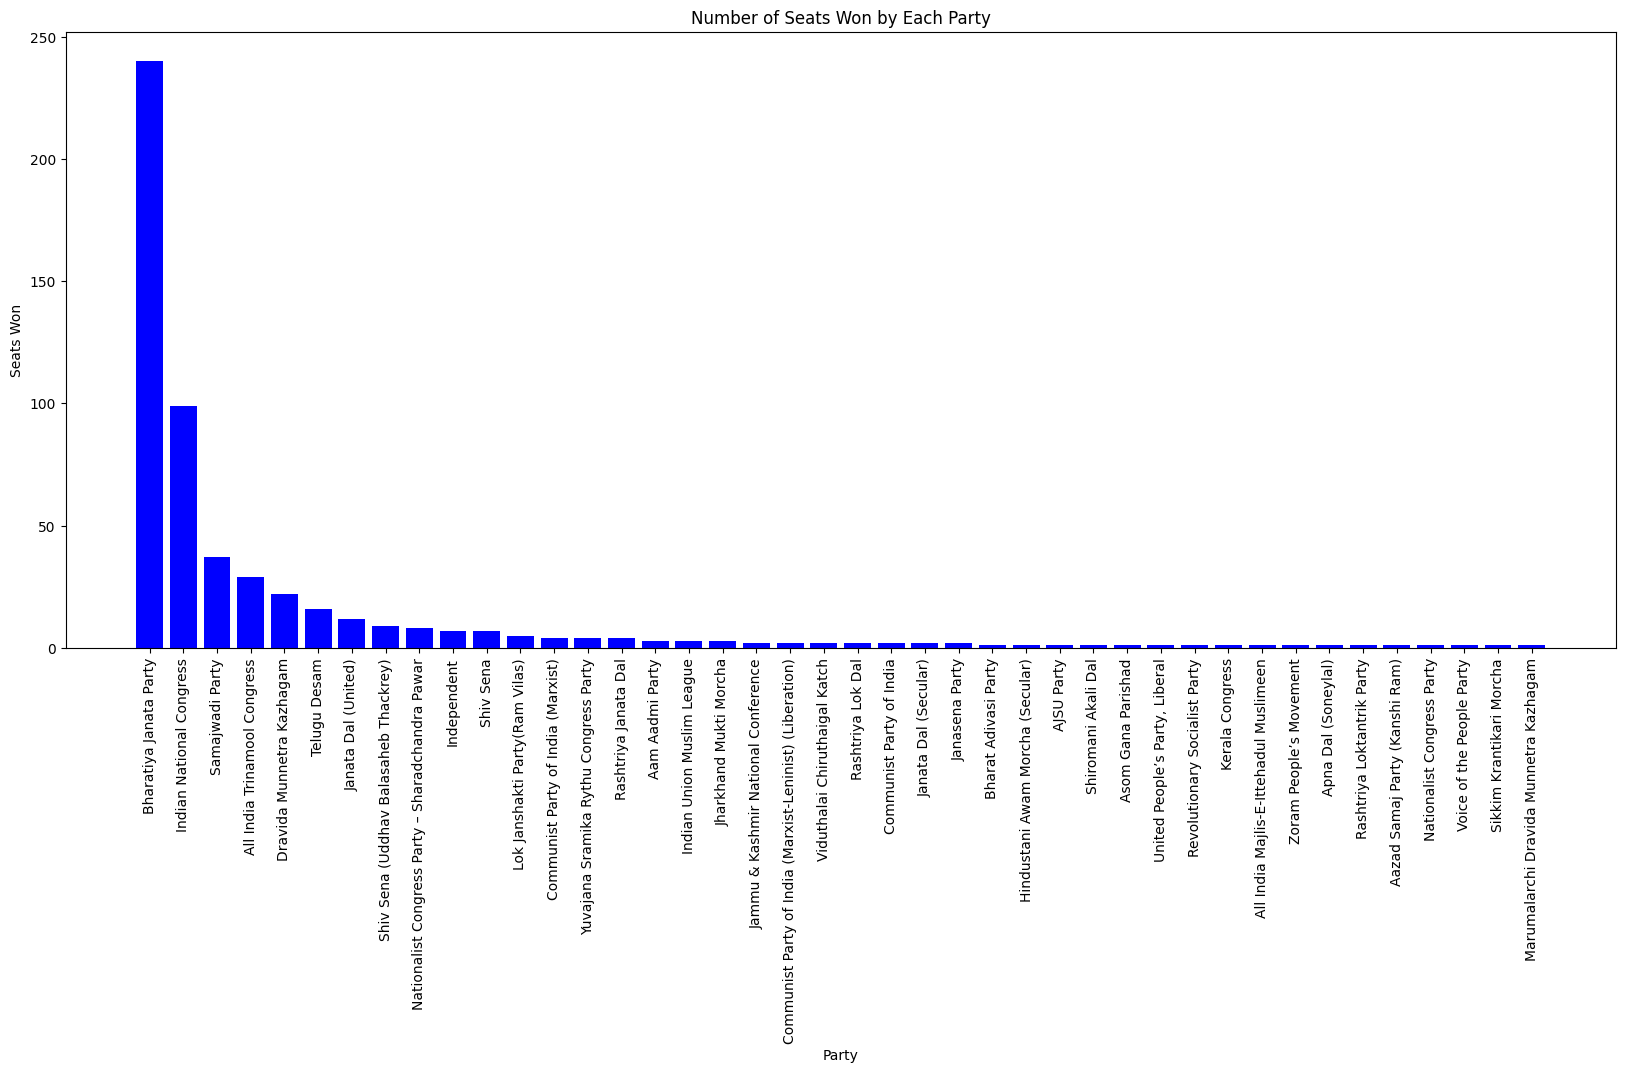

In [7]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
plt.bar(seats_won.index, seats_won.values, color='blue')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah

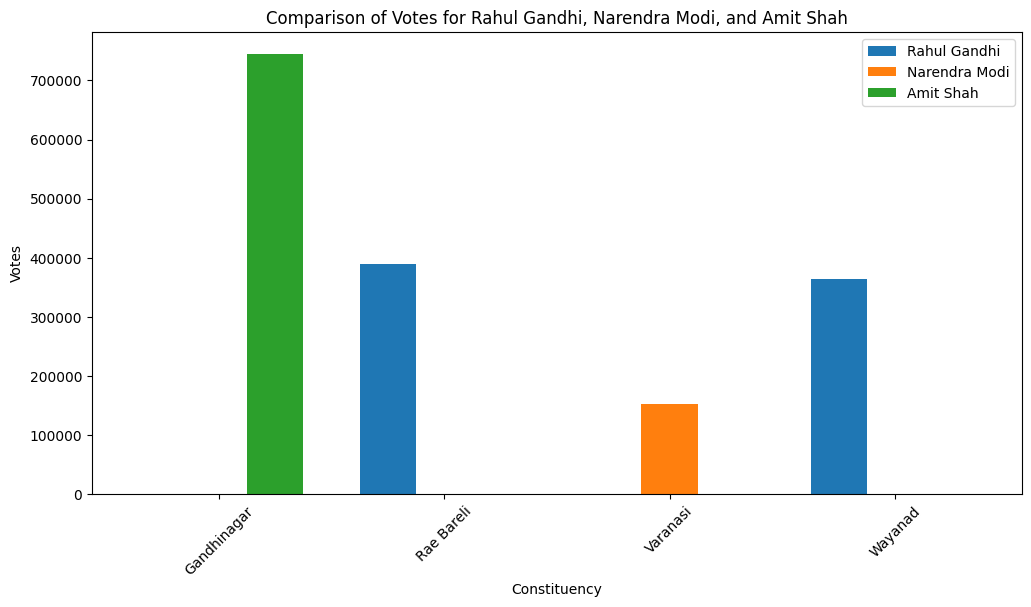

In [8]:
# Assuming `data` is your DataFrame
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get the votes and constituency names
rahul_votes = rahul_entries.set_index('Constituency')['Margin'].to_dict()
modi_votes = modi_entries.set_index('Constituency')['Margin'].to_dict()
amit_votes = amit_entries.set_index('Constituency')['Margin'].to_dict()

# Combine all constituencies
all_constituencies = sorted(set(rahul_votes.keys()) | set(modi_votes.keys()) | set(amit_votes.keys()))

# Fill missing values with 0
rahul_votes_filled = [rahul_votes.get(c, 0) for c in all_constituencies]
modi_votes_filled = [modi_votes.get(c, 0) for c in all_constituencies]
amit_votes_filled = [amit_votes.get(c, 0) for c in all_constituencies]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes_filled) + ['Narendra Modi'] * len(modi_votes_filled) + ['Amit Shah'] * len(amit_votes_filled),
    'Constituency': all_constituencies * 3,
    'Votes': rahul_votes_filled + modi_votes_filled + amit_votes_filled
})

# Plot the comparison 
candidates = data_to_plot['Candidate'].unique()
bar_width = 0.25

# Create a figure
plt.figure(figsize=(12, 6))
# Create an array of positions for each bar
r = np.arange(len(all_constituencies))

# Plotting each candidate's data
for i, candidate in enumerate(candidates):
    votes = data_to_plot[data_to_plot['Candidate'] == candidate]['Votes']
    plt.bar(r + i * bar_width, votes, width=bar_width, label=candidate)

# Add labels and titles
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(r + bar_width, all_constituencies, rotation=45)
plt.legend()

# Show the plot
plt.show()


# Highest and lowest Victory Candidate

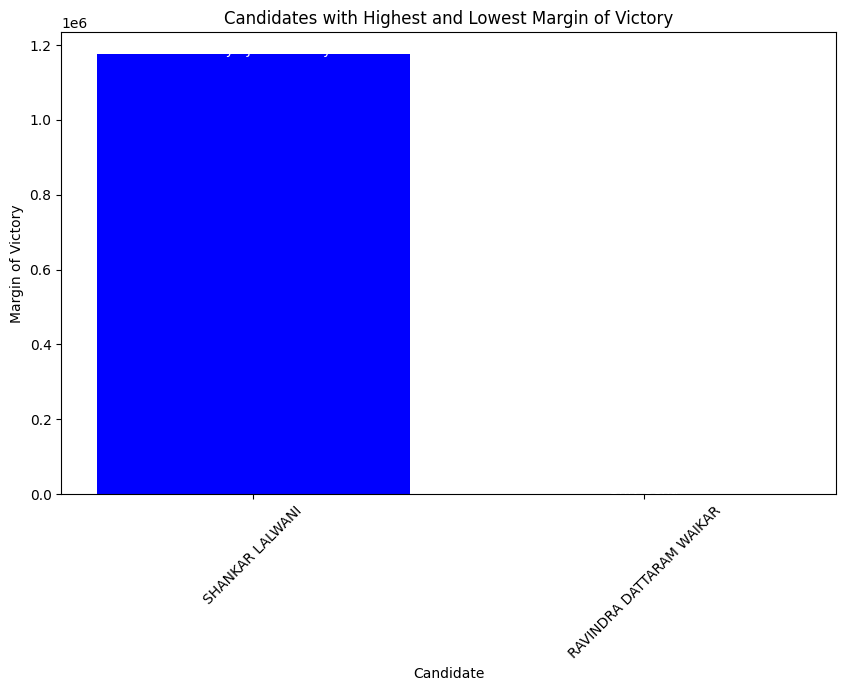

In [9]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison 
plt.figure(figsize=(10, 6))
# Create a bar plot
candidates = data_to_plot['Candidate']
margins = data_to_plot['Margin']
parties = data_to_plot['Party']

colors = ['blue', 'red']  

bars = plt.bar(candidates, margins, color=colors)

# Add party labels directly on the bars
for bar, party in zip(bars, parties):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, party, ha='center', color='white')

# Add labels and titles
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)

# Show the plot
plt.show()

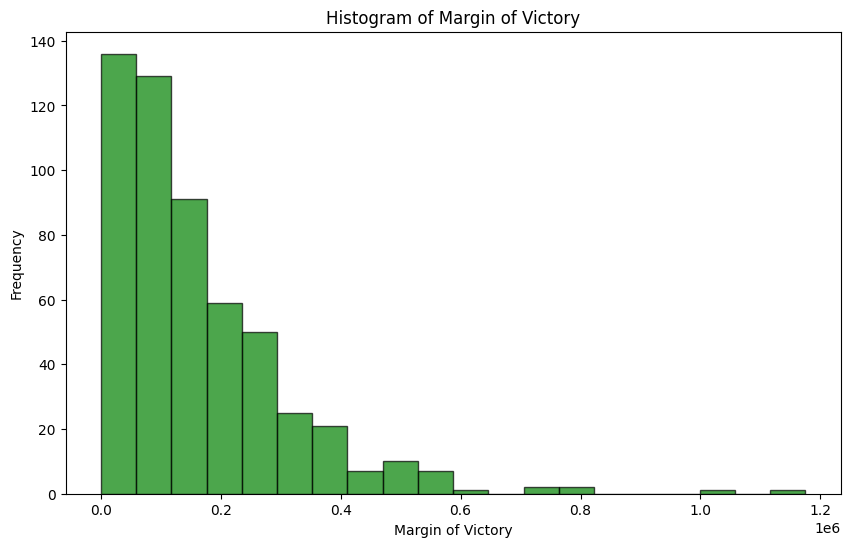

In [10]:
plt.figure(figsize=(10, 6))
margins = data['Margin']
plt.hist(margins, bins=20, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

# Votes distribution by party

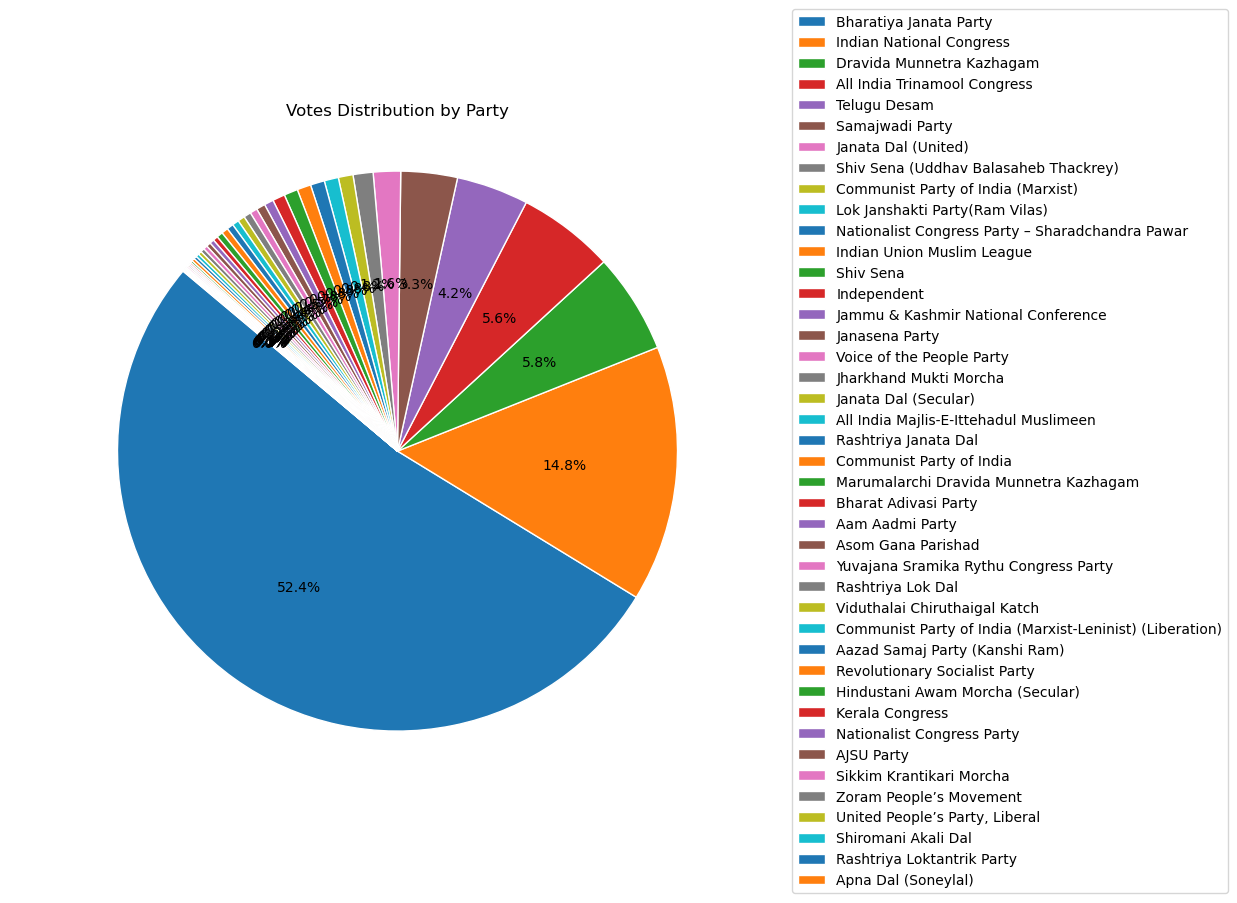

In [15]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

# Top 10 trailing party by VOTE

In [12]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

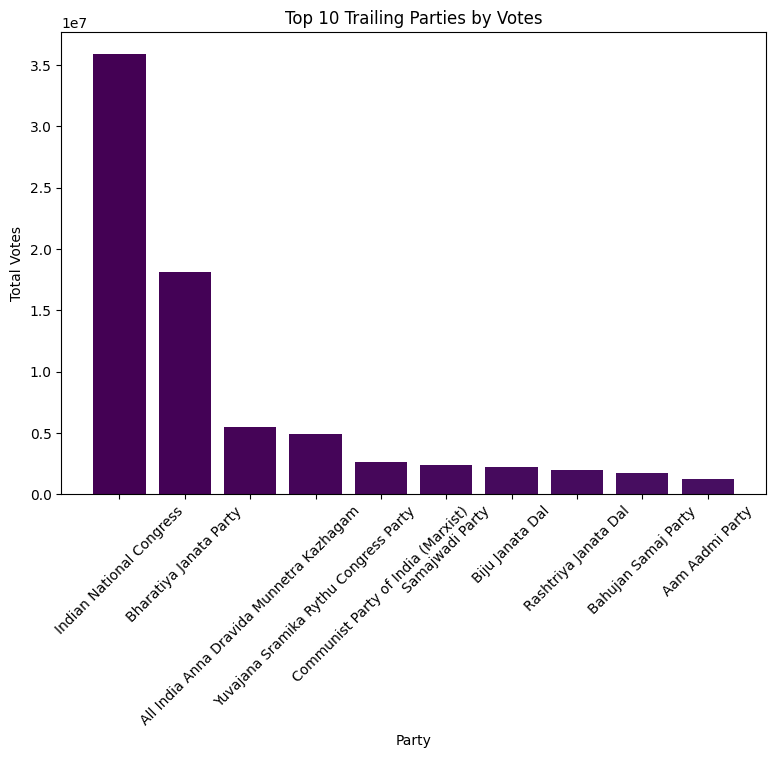

In [13]:
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
plt.bar(trailing_party_votes.index[:10], trailing_party_votes.values[:10], color=plt.get_cmap('viridis')(range(10)))
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

# Top 10 trailing party by SEAT

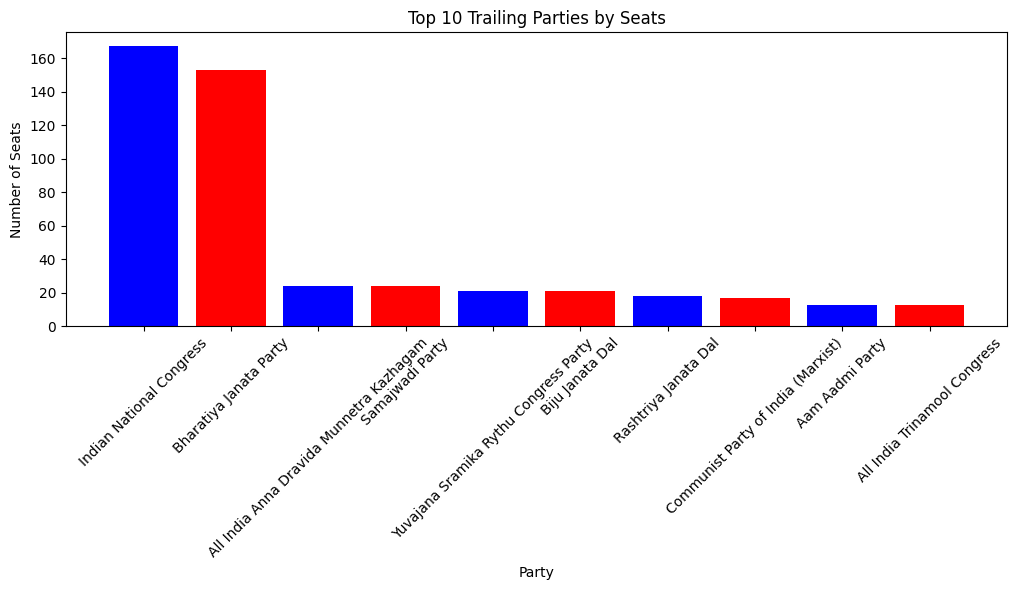

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
plt.bar(trailing_party_seats.index[:10], trailing_party_seats.values[:10], color=colors)
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()